<a href="https://colab.research.google.com/github/ssddatascience/LogisticRegression/blob/main/LogisticRegressionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
#Problem Statement:
# Predication Heart diseas 
# Domain – Medical domain

In [150]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

Loading Dataset

In [195]:
df = pd.read_csv("Heart.csv")

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          303 non-null    int64  
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(1), int64(11), object(3)
memory usage: 35.6+ KB


The dataset consists of 303 individuals data. There are 14 columns in the dataset, which are described below.

Age: displays the age of the individual.
Sex: displays the gender of the individual using the following format :
1 = male
0 = female

Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
1 = typical angina
2 = atypical angina
3 = non — anginal pain
4 = asymptotic

Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit)

Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)
Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.

If fasting blood sugar > 120mg/dl then : 1 (true)
else : 0 (false)

Resting ECG : displays resting electrocardiographic results
0 = normal
1 = having ST-T wave abnormality
2 = left ventricular hyperthrophy

Max heart rate achieved : displays the max heart rate achieved by an individual.
Exercise induced angina :
1 = yes
0 = no

ST depression induced by exercise relative to rest: displays the value which is an integer or float.
Peak exercise ST segment :
1 = upsloping
2 = flat
3 = downsloping
Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

Thal : displays the thalassemia :
3 = normal
6 = fixed defect
7 = reversible defect
# New Section
Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not :
0 = absence
1, 2, 3, 4 = present.

In [197]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No


# AHD Last coloum is our target variable

Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not :
0 = absence
1, 2, 3, 4 = present.

In [198]:
df['Age'] = df['Age'].fillna(0)
df['Sex'] = df['Sex'].fillna(0)
df['RestBP'] = df['RestBP'].fillna(0)
df['Chol'] = df['Chol'].fillna(0)
df['Fbs'] = df['Fbs'].fillna(0)
df['RestECG'] = df['RestECG'].fillna(0)
df['ExAng'] = df['ExAng'].fillna(0)
df['Oldpeak'] = df['Oldpeak'].fillna(0)
df['Slope'] = df['Slope'].fillna(0) 
df['Ca'] = df['Ca'].fillna(0) 


In [199]:
# replace the ‘AHD' column contains
# the values 'yes' and 'no'  with 
# True and  False:
df['AHD'] = df['AHD'].map(
                   {'Yes':True ,'No':False})

In [37]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,False
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,True
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,True
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,False
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,False


In [200]:
df['AHD'] = df['AHD'].astype('int')

In [201]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,1
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,0


Data Exploration 

In [202]:
df['AHD'].value_counts()

0    164
1    139
Name: AHD, dtype: int64

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

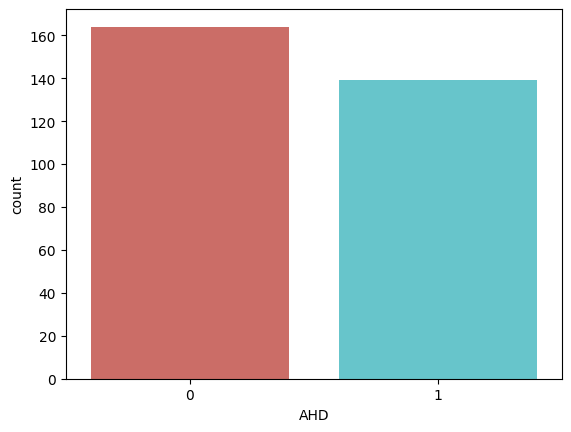

In [204]:
sns.countplot(x ='AHD', data = df, palette ='hls')
plt.show()

split the data into features (X) and target (y) Label

In [205]:
df.value_counts("Thal")

Thal
normal        166
reversable    117
fixed          18
dtype: int64

In [206]:
#Thal = {'normal': 1,'reversable': 2, 'fixed': 3}
df.Thal[df.Thal == 'normal'] = 1
df.Thal[df.Thal == 'reversable'] = 2
df.Thal[df.Thal == 'fixed'] = 3

print(df)
df['Thal'] = df['Thal'].astype('int')
df['Thal'] = df['Thal'].fillna(0) 


     Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0             1   63    1       typical     145   233    1        2    150   
1             2   67    1  asymptomatic     160   286    0        2    108   
2             3   67    1  asymptomatic     120   229    0        2    129   
3             4   37    1    nonanginal     130   250    0        0    187   
4             5   41    0    nontypical     130   204    0        2    172   
..          ...  ...  ...           ...     ...   ...  ...      ...    ...   
298         299   45    1       typical     110   264    0        0    132   
299         300   68    1  asymptomatic     144   193    1        0    141   
300         301   57    1  asymptomatic     130   131    0        0    115   
301         302   57    0    nontypical     130   236    0        2    174   
302         303   38    1    nonanginal     138   175    0        0    173   

     ExAng  Oldpeak  Slope  Ca Thal  AHD  
0        0      2.3 

<ipython-input-206-6a010b0250e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Thal[df.Thal == 'normal'] = 1
<ipython-input-206-6a010b0250e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Thal[df.Thal == 'reversable'] = 2
<ipython-input-206-6a010b0250e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Thal[df.Thal == 'fixed'] = 3


ValueError: ignored

In [207]:
df.info() #X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          303 non-null    int64  
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


In [208]:
df['Thal'] = df['Thal'].fillna(0) 

In [209]:
df.info() #X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          303 non-null    int64  
 13  Thal        303 non-null    int64  
 14  AHD         303 non-null    int64  
dtypes: float64(1), int64(13), object(1)
memory usage: 35.6+ KB


In [210]:
df.value_counts("ChestPain")

ChestPain
asymptomatic    144
nonanginal       86
nontypical       50
typical          23
dtype: int64

In [211]:
df.ChestPain[df.ChestPain == 'asymptomatic'] = 1
df.ChestPain[df.ChestPain == 'nonanginal'] = 2
df.ChestPain[df.ChestPain == 'nontypical'] = 3
df.ChestPain[df.ChestPain == 'typical'] = 4
print(df)
df['ChestPain'] = df['ChestPain'].fillna(0) 


     Unnamed: 0  Age  Sex ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  \
0             1   63    1         4     145   233    1        2    150      0   
1             2   67    1         1     160   286    0        2    108      1   
2             3   67    1         1     120   229    0        2    129      1   
3             4   37    1         2     130   250    0        0    187      0   
4             5   41    0         3     130   204    0        2    172      0   
..          ...  ...  ...       ...     ...   ...  ...      ...    ...    ...   
298         299   45    1         4     110   264    0        0    132      0   
299         300   68    1         1     144   193    1        0    141      0   
300         301   57    1         1     130   131    0        0    115      1   
301         302   57    0         3     130   236    0        2    174      0   
302         303   38    1         2     138   175    0        0    173      0   

     Oldpeak  Slope  Ca  Th

<ipython-input-211-20290103eca0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ChestPain[df.ChestPain == 'asymptomatic'] = 1
<ipython-input-211-20290103eca0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ChestPain[df.ChestPain == 'nonanginal'] = 2
<ipython-input-211-20290103eca0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ChestPain[df.ChestPain == 'nontypical'] = 3
<ipython-input-211-20290103eca0>:4: SettingWithCop

In [212]:
df['Ca'] = df['Ca'].fillna(0)
print(df)

     Unnamed: 0  Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0             1   63    1          4     145   233    1        2    150   
1             2   67    1          1     160   286    0        2    108   
2             3   67    1          1     120   229    0        2    129   
3             4   37    1          2     130   250    0        0    187   
4             5   41    0          3     130   204    0        2    172   
..          ...  ...  ...        ...     ...   ...  ...      ...    ...   
298         299   45    1          4     110   264    0        0    132   
299         300   68    1          1     144   193    1        0    141   
300         301   57    1          1     130   131    0        0    115   
301         302   57    0          3     130   236    0        2    174   
302         303   38    1          2     138   175    0        0    173   

     ExAng  Oldpeak  Slope  Ca  Thal  AHD  
0        0      2.3      3   0     3    0  
1        1 

In [213]:
 df.isnull().values.any()

False

In [225]:
plotPerColumnDistribution(df1, 10, 5)

NameError: ignored

In [214]:
X = pd.DataFrame(df.iloc[:,:-1])
y = pd.DataFrame(df.iloc[:,-1])
print(df)
#X.head()

     Unnamed: 0  Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0             1   63    1          4     145   233    1        2    150   
1             2   67    1          1     160   286    0        2    108   
2             3   67    1          1     120   229    0        2    129   
3             4   37    1          2     130   250    0        0    187   
4             5   41    0          3     130   204    0        2    172   
..          ...  ...  ...        ...     ...   ...  ...      ...    ...   
298         299   45    1          4     110   264    0        0    132   
299         300   68    1          1     144   193    1        0    141   
300         301   57    1          1     130   131    0        0    115   
301         302   57    0          3     130   236    0        2    174   
302         303   38    1          2     138   175    0        0    173   

     ExAng  Oldpeak  Slope  Ca  Thal  AHD  
0        0      2.3      3   0     3    0  
1        1 

In [215]:
y.head()

,AHD
0,0
1,1
2,1
3,0
4,0


# Split the data into training and test dataset

In [216]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [217]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

#x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [218]:
#Create and Train Model

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [219]:
#Predicting Test set Results
y_predt=logmodel.predict(X_test)

Calculate Acuuracy

In [220]:
print('Acuuracy: %d',(logmodel.score(X_test,y_test)))

Acuuracy: %d 0.819672131147541


In [221]:
#Evaluate Model using Confusion Matrix
from sklearn.metrics import confusion_matrix
con_matrix=confusion_matrix(y_test,y_predt)

print(con_matrix)

[[29  5]
 [ 6 21]]


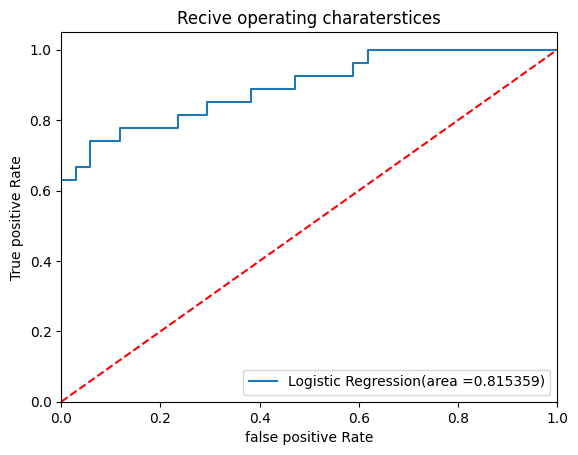

In [224]:
# above result saying 29+21 correct prediction , where as 6+5 incorrect
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, threshold = roc_curve(y_test,logmodel.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression(area =%02f)' % logit_roc_auc)
plt.plot([0, 1],[0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('false positive Rate')
plt.ylabel('True positive Rate')
plt.title('Recive operating charaterstices')
plt.legend(loc ='lower right')
plt.savefig('log-roc')
plt.show()
